# Import libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Length of survived people**

In [18]:
survived = df[df.Survived==1]
len(survived)

342

**Length of not survived people**

In [20]:
survived = df[df.Survived==0]
len(survived)

#another way
#df.shape[0]-len(survived)

549

**Total number of people in each class**

In [27]:
classes = df.groupby("Pclass")
classes.describe()

#Another Way
#Total number of First class people
#fclass = df[df.Pclass ==1]
#len(fclass)
#Total number of Second class people
#sclass = df[df.Pclass == 2]
#len(sclass)
#Total number of Third class people
#tclass = df[df.Pclass == 3]
#len(tclass)

PassengerId                                                             \
             count        mean         std   min     25%    50%    75%    max   
Pclass                                                                          
1            216.0  461.597222  246.737616   2.0  270.75  472.0  670.5  890.0   
2            184.0  445.956522  250.852161  10.0  234.50  435.5  668.0  887.0   
3            491.0  439.154786  264.441453   1.0  200.00  432.0  666.5  891.0   

       Survived            ... Parch        Fare                             \
          count      mean  ...   75%  max  count       mean        std  min   
Pclass                     ...                                                
1         216.0  0.629630  ...   0.0  4.0  216.0  84.154687  78.380373  0.0   
2         184.0  0.472826  ...   1.0  3.0  184.0  20.662183  13.417399  0.0   
3         491.0  0.242363  ...   0.0  6.0  491.0  13.675550  11.778142  0.0   

                                           
             25%      50%   75%       max  
Pclass                                     
1       30.92395  60.2875  93.5  512.3292  
2       13.00000  14.2500  26.0   73.5000  
3        7.75000   8.0500  15.5   69.5500  

[3 rows x 48 columns]

**Mean age of people who survived**

In [29]:
df["Age"][df.Survived==1].mean()

28.343689655172415

**Total number of males on Titanic**

In [30]:
males = df[df.Sex == "male"]
len(males)

577

**Total number of females on Titanic**

In [31]:
females = df[df.Sex == "female"]
len(females)

314

**people who survived and on first class**

In [33]:
fsur = df [(df.Survived == 1) & (df.Pclass == 1) ]
len(fsur)

136

**people who survived and on second class**

In [34]:
fsur = df [(df.Survived == 1) & (df.Pclass == 2) ]
len(fsur)

87

**people who survived and on third class**

In [35]:
fsur = df [(df.Survived == 1) & (df.Pclass == 3) ]
len(fsur)

119

In [36]:
len(df[ (df.Pclass ==1 ) & (df.Age.isnull()) & (df.Survived ==1)])

14

In [39]:
len(df[ (df.Pclass ==1 ) & (df.Age.isnull())])

30

In [40]:
len(df[ (df.Pclass ==2 ) & (df.Age.isnull())])

11

In [41]:
len(df[ (df.Pclass ==3 ) & (df.Age.isnull())])

136

In [43]:
#Replacing nan values
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [44]:
df.drop(["Name"] , axis=1, inplace=True)

In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

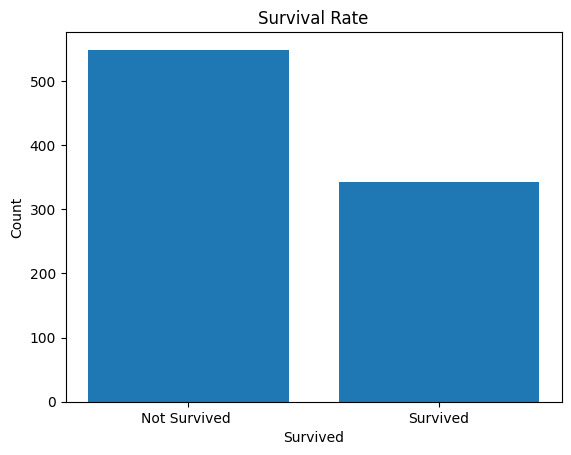

In [47]:
plt.bar(["Not Survived ","Survived"], df["Survived"].value_counts())
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Rate")
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

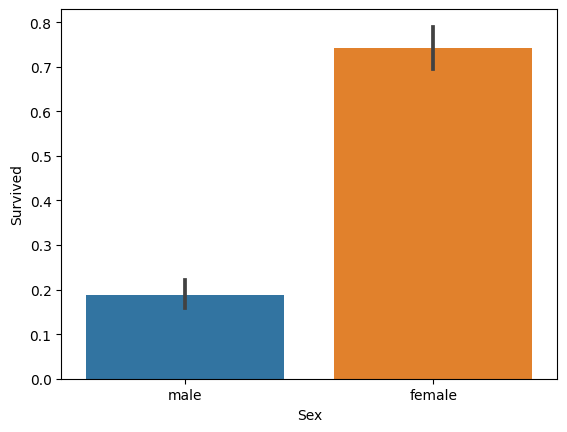

In [50]:
sns.barplot(x= "Sex" , y="Survived" , data = df)

<Axes: xlabel='Embarked', ylabel='Survived'>

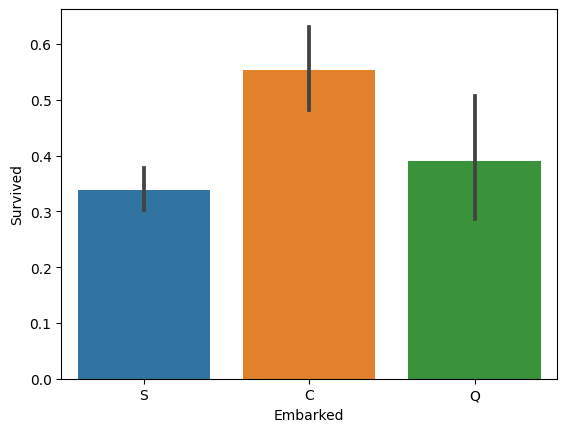

In [51]:
sns.barplot(x= "Embarked" , y="Survived" , data = df)

<Axes: xlabel='Parch', ylabel='Survived'>

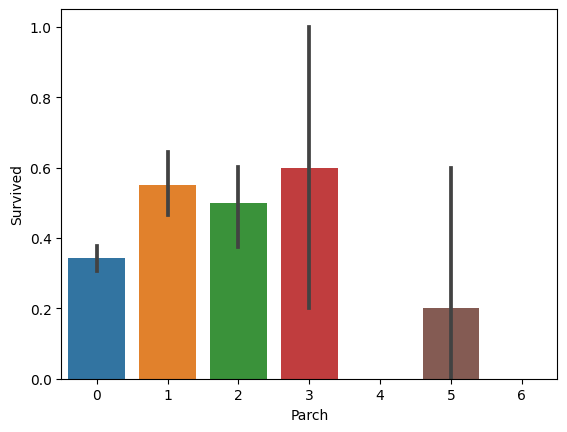

In [52]:
sns.barplot(x= "Parch" , y="Survived" , data = df)

<Axes: xlabel='SibSp', ylabel='Survived'>

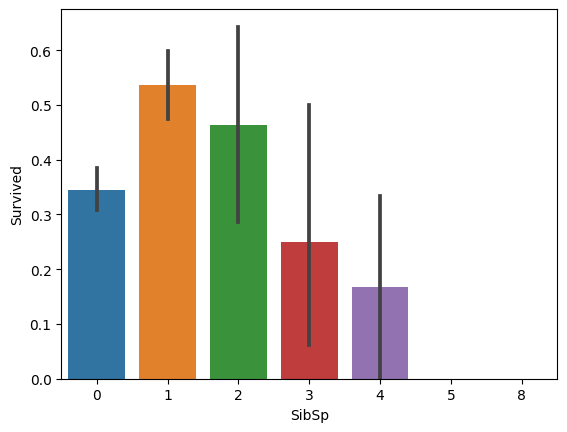

In [55]:
sns.barplot(x= "SibSp" , y="Survived" , data = df)